In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load data from CSV files
train_df = pd.read_csv("sign_mnist_train.csv")
valid_df = pd.read_csv("sign_mnist_valid.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
# Separate target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate image vectors
x_train = train_df.values
x_valid = valid_df.values

In [4]:
# Turn scalar targets into binary categories
num_classes = 24 # because ASL dataset does not contain images for 'j' and 'z', as they are represented by some hand movements
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalization
x_train = x_train / 255
x_valid = x_valid / 255

# Prep the image data for CNN
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [5]:
# Sequential Model
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) # Compile model

In [7]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 172s 200ms/step - loss: 0.2922 - accuracy: 0.9103 - val_loss: 0.4511 - val_accuracy: 0.8776
Epoch 2/20
858/858 [==============================] - 163s 190ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.2250 - val_accuracy: 0.9434
Epoch 3/20
858/858 [==============================] - 161s 188ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.2791 - val_accuracy: 0.9283
Epoch 4/20
858/858 [==============================] - 167s 194ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.3413 - val_accuracy: 0.9509
Epoch 5/20
858/858 [==============================] - 162s 189ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1900 - val_accuracy: 0.9636
Epoch 6/20
858/858 [==============================] - 162s 189ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.2794 - val_accuracy: 0.9459
Epoch 7/20
858/858 [==============================] - 163s 189ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.2176 -

In [8]:
# To increase accuracy, perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
) 

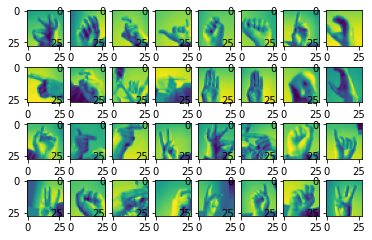

In [9]:
# To visualise what kind of batches model is trained with
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
  image = x[i]
  ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [10]:
datagen.fit(x_train) # fit data generator on training dataset

In [11]:
# Sequential model_aug
model_aug = Sequential()
model_aug.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model_aug.add(BatchNormalization())
model_aug.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_aug.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model_aug.add(Dropout(0.2))
model_aug.add(BatchNormalization())
model_aug.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_aug.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model_aug.add(BatchNormalization())
model_aug.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_aug.add(Flatten())
model_aug.add(Dense(units=512, activation="relu"))
model_aug.add(Dropout(0.3))
model_aug.add(Dense(units=num_classes, activation="softmax"))

In [12]:
model_aug.compile(loss='categorical_crossentropy', metrics=['accuracy']) # Compile model

In [13]:
model_aug.fit(img_iter, epochs=20, steps_per_epoch=len(x_train)/batch_size, validation_data=(x_valid, y_valid)) # steps * batch_size = number_of_images_trained in an epoch

Epoch 1/20
858/857 [==============================] - 169s 197ms/step - loss: 1.0813 - accuracy: 0.6503 - val_loss: 0.8356 - val_accuracy: 0.7344
Epoch 2/20
858/857 [==============================] - 169s 197ms/step - loss: 0.3152 - accuracy: 0.8910 - val_loss: 0.1935 - val_accuracy: 0.9275
Epoch 3/20
858/857 [==============================] - 174s 202ms/step - loss: 0.1984 - accuracy: 0.9335 - val_loss: 0.1243 - val_accuracy: 0.9494
Epoch 4/20
858/857 [==============================] - 171s 200ms/step - loss: 0.1480 - accuracy: 0.9502 - val_loss: 0.6646 - val_accuracy: 0.8589
Epoch 5/20
858/857 [==============================] - 169s 197ms/step - loss: 0.1230 - accuracy: 0.9604 - val_loss: 0.1017 - val_accuracy: 0.9668
Epoch 6/20
858/857 [==============================] - 212s 247ms/step - loss: 0.1064 - accuracy: 0.9659 - val_loss: 0.4570 - val_accuracy: 0.8797
Epoch 7/20
858/857 [==============================] - 317s 370ms/step - loss: 0.0985 - accuracy: 0.9687 - val_loss: 0.0709 -